In [2]:
import os
# import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display, HTML
import const

dirDsPath = const.DATASET_CLEAN_PATH

# Liste des échantillons à disposition
ech = [setPath for setPath in os.listdir(dirDsPath)]

print("Échantillons disponibles : ", ech)

C:\Users\Reizak\AppData\Local\Temp\ipykernel_10236\256806106.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Échantillons disponibles :  ['test', 'train', 'valid']


In [4]:
# Création d'un dictionnaire qui pour chaque échantillon mis à disposition contient la classe 
# et le nombre d'images associées

dic={}

for source in ech:
    #Chemin de l'échantillon
    path_ech = os.path.join(const.DATASET_CLEAN_PATH, source)

    # Liste des classes disponibles pour l'échantillon concerné (1 dossier = 1 classe)
    classe = []
    for item in os.listdir(path_ech):
        classe.append(item)

    # Comptage du nombre d'images par classe pour l'échantillon concerné
    images_count = []
    for folder in classe:
        items = os.listdir(os.path.join(path_ech, folder))
        images_count.append(len(items))
    
    # Ajout des informations au dictionnaire
    dic.update({source:{'classe': classe,
                     'img_nbr': images_count}})


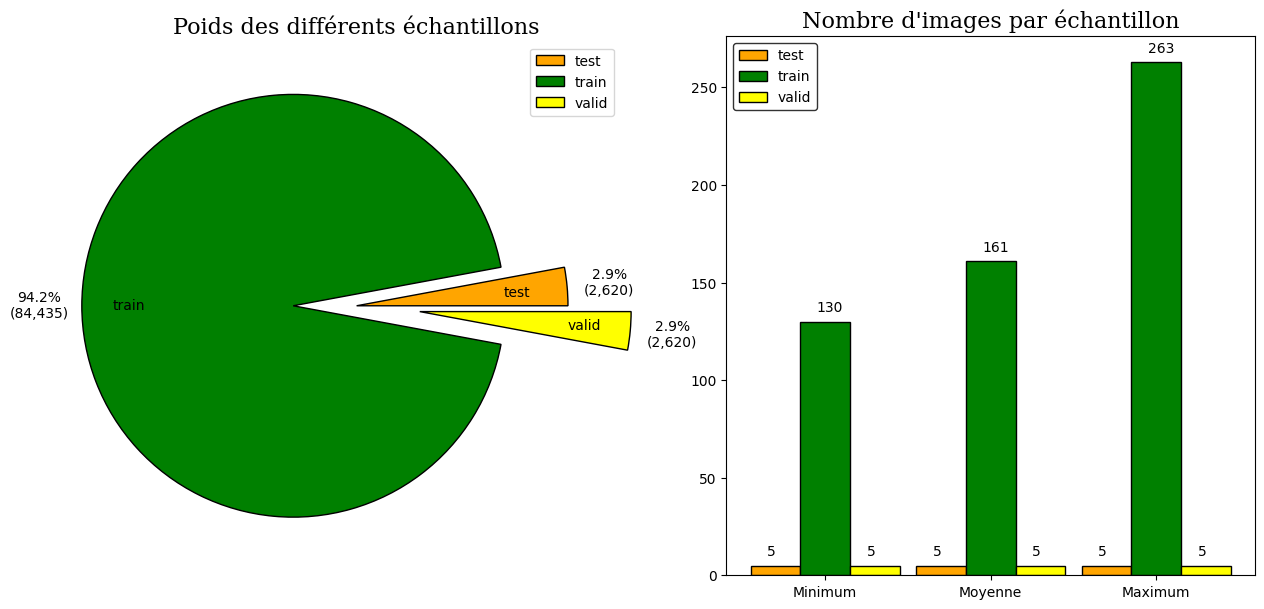

In [5]:
# Calcul de différentes métriques par échantillon
qtt, mini, maxi, moy = [], [], [], []

for k in dic.keys():
    qtt.append(sum(dic[k]['img_nbr']))
    mini.append(min(dic[k]['img_nbr']))
    maxi.append(max(dic[k]['img_nbr']))
    moy.append(sum(dic[k]['img_nbr'])/len(dic[k]['img_nbr']))

# Calcul du nombre total d'images (pour calcul %)
total = sum(qtt)

# Fonction pour affichage personnalisé pie chart
def aff_per(x):
    return '{:.1f}%\n({:,.0f})'.format(x, total*x/100)

# Création des graphiques
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
coul = ['orange','green','yellow']

# Pie chart
ax1.pie(qtt, labels=ech,
        colors=coul,
        explode=[0, 0.3, 0.3],
        labeldistance=0.7,
        autopct=aff_per,
        pctdistance=1.2,
        wedgeprops={"edgecolor":"k",'linewidth': 1})
ax1.legend(loc='best')
titre = ax1.set_title("Poids des différents échantillons")
titre.set(color="black", fontsize="16", fontfamily="serif")

# Plot bar
barWidth = 0.3 
for x in range(len(ech)):
    axe = [i + barWidth * (x - 1) for i in range(len(ech))]
    ax2.bar(axe, [mini[x], moy[x], maxi[x]], 
            color=coul[x], width=barWidth, 
            edgecolor='black', label=ech[x])
    # Ajout des valeurs sur les bars
    for index, value in zip(axe, [mini[x], moy[x], maxi[x]]):
        plt.text(index - 0.05, value + 5,
                str(int(value)))
ax2.set_xticks(np.arange(0.0, 3, 1))
ax2.set_xticklabels(['Minimum', 'Moyenne', 'Maximum'])
# ax2.set_xticklabels(['','', 'Minimum', '', 'Moyenne', '', 'Maximum'])
ax2.legend(loc='upper left', edgecolor='black')
titre = ax2.set_title("Nombre d'images par échantillon")
titre.set(color="black", fontsize="16", fontfamily="serif")

plt.show()


In [46]:
html_content = """

<p><b> Le poids des échantillons de test et de validation est faible. Cela peut poser la question 
d'un rééchantillonnage. </p>
On constate également que le nombre d'images par classe pour les échantillons de test et de validation est 
toujours le même (5) alors que celui pour l'échantillon d'entraînement varie selon les classes </b></p>

"""
display(HTML(html_content))

In [7]:
# Construction d'un dataframe "global"
test = pd.Series(dic['test']['img_nbr'], index=dic['test']['classe'], name='nb_img_test')
train = pd.Series(dic['train']['img_nbr'], index=dic['train']['classe'], name='nb_img_train')
valid = pd.Series(dic['valid']['img_nbr'], index=dic['valid']['classe'], name='nb_img_valid')
df_glob = pd.concat([test, train, valid], axis=1)
df_glob['nb_img_tot'] = df_glob.sum(axis = 1)
df_glob.index.name = 'classe'

# Calcul d'un top 0/1 pour non présence/présence de la classe dans l'échantillon
df_glob['pres_test'] = np.where(df_glob['nb_img_test'].isna(), 0, 1)
df_glob['pres_train'] = np.where(df_glob['nb_img_train'].isna(), 0, 1)
df_glob['pres_valid'] = np.where(df_glob['nb_img_valid'].isna(), 0, 1)

df_glob.head()


,nb_img_test,nb_img_train,nb_img_valid,nb_img_tot,pres_test,pres_train,pres_valid
classe,,,,,,,
ABBOTTS BABBLER,5.0,163.0,5.0,173.0,1,1,1
ABBOTTS BOOBY,5.0,180.0,5.0,190.0,1,1,1
ABYSSINIAN GROUND HORNBILL,5.0,179.0,5.0,189.0,1,1,1
AFRICAN CROWNED CRANE,5.0,135.0,5.0,145.0,1,1,1
AFRICAN EMERALD CUCKOO,5.0,154.0,5.0,164.0,1,1,1


In [8]:
df_glob

,nb_img_test,nb_img_train,nb_img_valid,nb_img_tot,pres_test,pres_train,pres_valid
classe,,,,,,,
ABBOTTS BABBLER,5.0,163.0,5.0,173.0,1,1,1
ABBOTTS BOOBY,5.0,180.0,5.0,190.0,1,1,1
ABYSSINIAN GROUND HORNBILL,5.0,179.0,5.0,189.0,1,1,1
AFRICAN CROWNED CRANE,5.0,135.0,5.0,145.0,1,1,1
AFRICAN EMERALD CUCKOO,5.0,154.0,5.0,164.0,1,1,1
...,...,...,...,...,...,...,...
YELLOW BREASTED CHAT,5.0,202.0,5.0,212.0,1,1,1
YELLOW CACIQUE,5.0,155.0,5.0,165.0,1,1,1
YELLOW HEADED BLACKBIRD,5.0,159.0,5.0,169.0,1,1,1


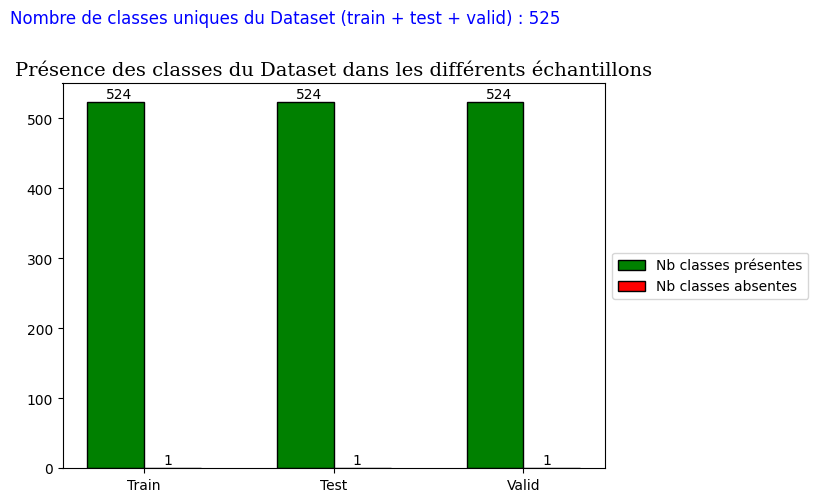

In [10]:
# Calcul du nombre de classes présentes et absentes par échantillon
pres = df_glob[['pres_train', 'pres_test', 'pres_valid']].sum()
non_pres = df_glob.shape[0] - pres

# Bar plot sur la présence des classes dans les échantillons
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
x1 = range(3)
x2 = [i + barWidth for i in x1]
ax1.bar(x1, pres, color='green', width=barWidth, edgecolor='black', label='Nb classes présentes')
ax1.bar(x2, non_pres, color='red', width=barWidth, edgecolor='black', label='Nb classes absentes');
# Ajout des valeurs sur les bars de présence
for index, value in zip(x1, pres):
    plt.text(index - 0.05, value + 5,
    str(int(value)))
# Ajout des valeurs sur les bars d'absence
for index, value in zip(x2, non_pres):
    plt.text(index - 0.05, value + 5,
    str(int(value)))
ax1.legend(loc='upper left', edgecolor='black')
titre = ax1.set_title("Présence des classes du Dataset dans les différents échantillons")
titre.set(color="black", fontsize="14", fontfamily="serif")
ax1.set_xticks(np.arange(0.15, 3, 1))
ax1.set_xticklabels(['Train', 'Test', 'Valid'])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.text(0.05, 1, f"Nombre de classes uniques du Dataset (train + test + valid) : {df_glob.shape[0]:.0f}", 
         fontsize=12, transform=plt.gcf().transFigure, color='blue')

plt.show()


In [49]:
html_content = """

<p><b> 1 classe est manquante dans chacun des échantillons. <p>
Il y a donc une incohérence entre les échantillons. </b>
<p><i>Exemple : classe présente dans le jeu de données test mais non présente dans le jeu de donnés d'entraînement </p>

"""
display(HTML(html_content))

In [11]:
# Affichage des incohérences de classes entre les échantillons
print(df_glob[df_glob.isna().any(axis = 1)][['pres_test', 'pres_train', 'pres_valid']])

                  pres_test  pres_train  pres_valid
classe                                             
PARAKETT  AUKLET          1           1           0
PARAKETT AUKLET           0           0           1


In [51]:
html_content = """

<p><b> Le dossier "PARAKETT  AUKLET" de l'échantillon de test et d'entraînement sera donc à renommer lors du 
préprocessing </p>

"""
display(HTML(html_content))

In [18]:
html_content = """

<p><b> Analyse de la distribution de l'échantillon train </p>

"""
display(HTML(html_content))

df_train = pd.DataFrame(df_glob.loc[df_glob['pres_train']==1]['nb_img_train'])

df_train.head()

,nb_img_train
classe,
ABBOTTS BABBLER,163.0
ABBOTTS BOOBY,180.0
ABYSSINIAN GROUND HORNBILL,179.0
AFRICAN CROWNED CRANE,135.0
AFRICAN EMERALD CUCKOO,154.0


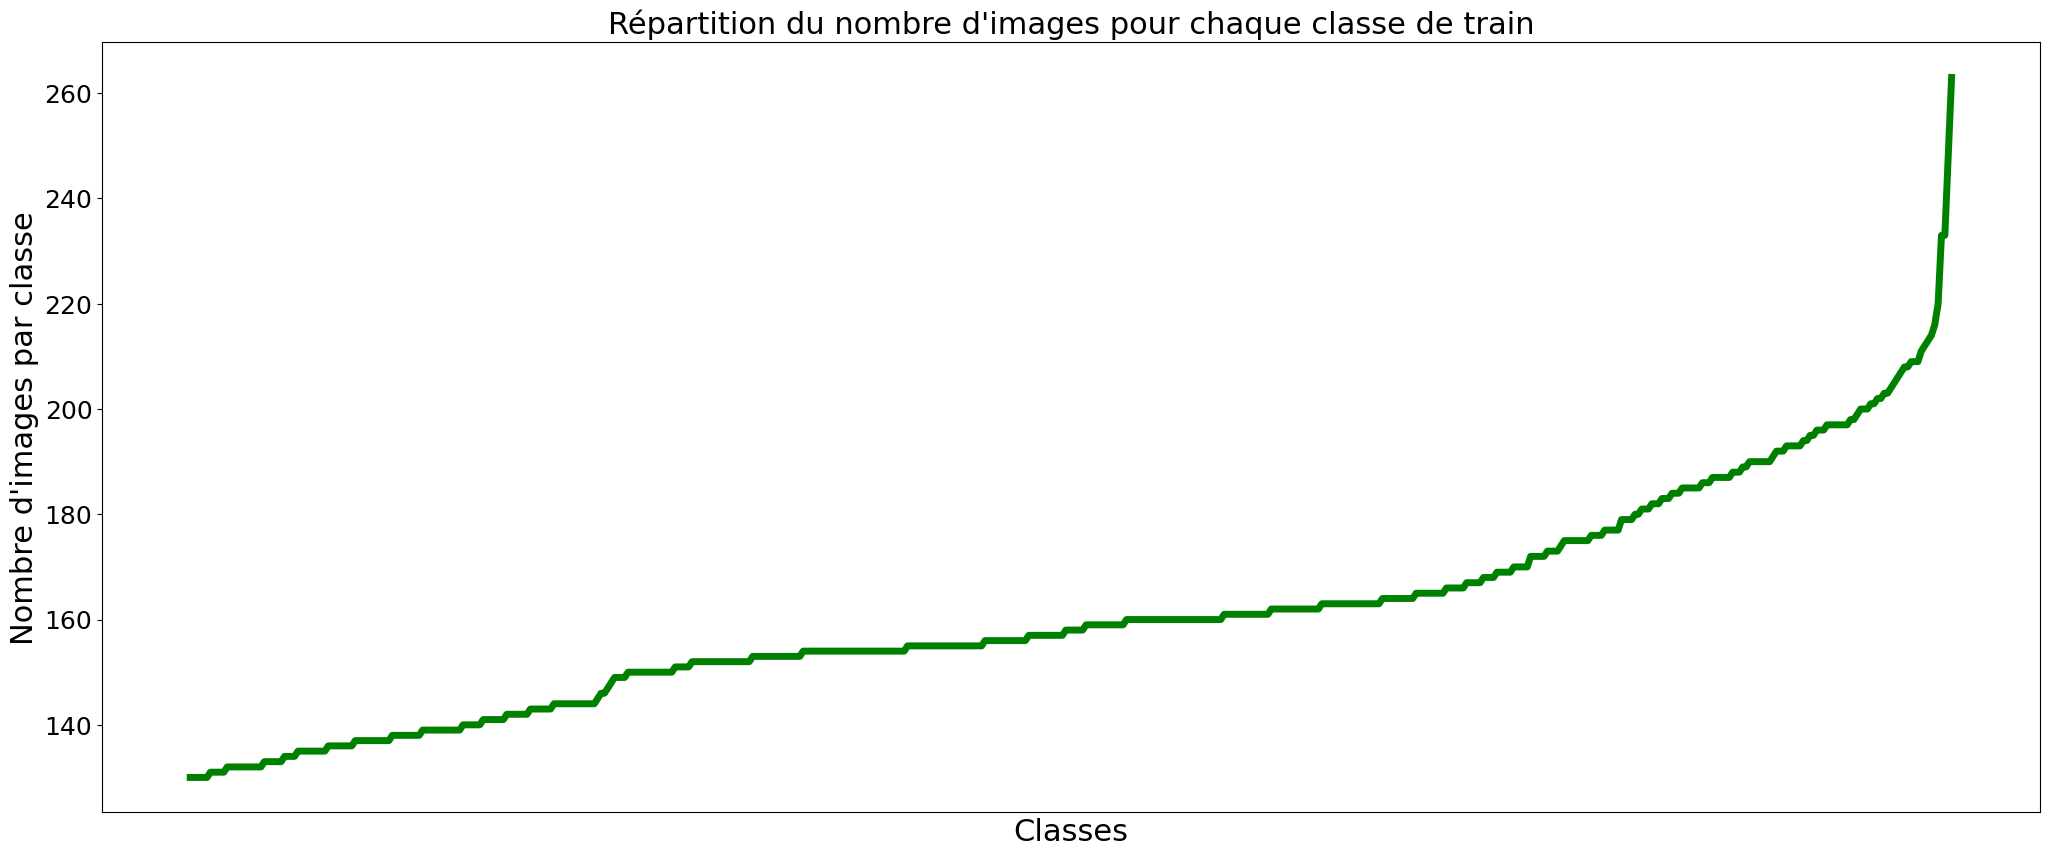

In [14]:
# on affiche une courbe représentant le nombre d'images par classe pour train

plt.figure(figsize = (25,10))
df_train = df_train.sort_values(by = 'nb_img_train')
plt.plot(df_train.index, df_train.nb_img_train, linewidth = 5, color = 'green')
plt.title("Répartition du nombre d'images pour chaque classe de train", fontsize = 22)
plt.xlabel("Classes", fontsize = 22)
plt.ylabel("Nombre d'images par classe", fontsize = 22)
plt.xticks([])
plt.yticks(fontsize = 18);

In [54]:
html_content = """

<p><b> Ce graphique montre que la répartition du nombre d'images entre les classes est très hétérogène, avec quelques valeurs très élevées. </b></p>

"""
display(HTML(html_content))

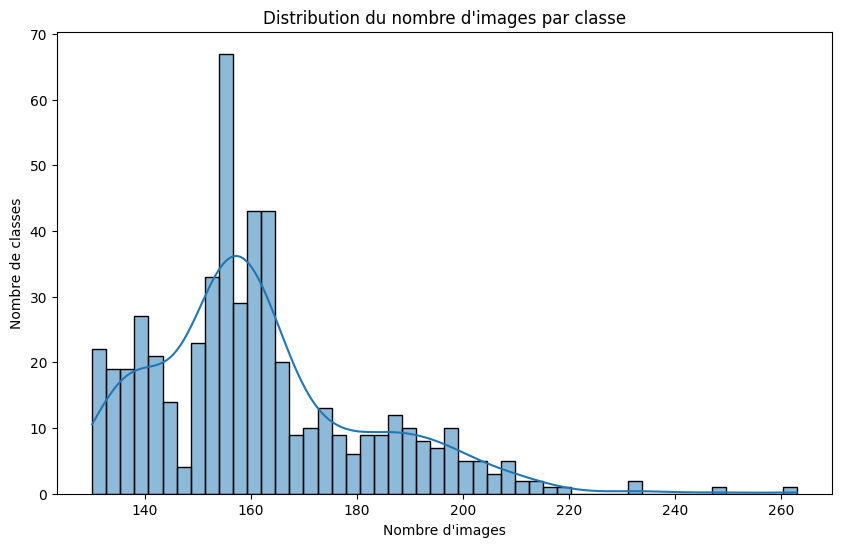

In [15]:
# création d'un graphique de distribution avec courbe Kde

plt.figure(figsize=(10, 6))
sns.histplot(df_train['nb_img_train'], bins=50, kde=True)
plt.title('Distribution du nombre d\'images par classe')
plt.xlabel('Nombre d\'images')
plt.ylabel('Nombre de classes')
plt.show()

In [56]:
html_content = """

<p><b> Ce graphique indique que la majorité des classes ont un nombre d'images compris entre 150 et 180,
tandis que le reste est inférieur ou supérieur à cette plage, avec quelques rares valeurs au dessus de 220. </b></p>

"""
display(HTML(html_content))

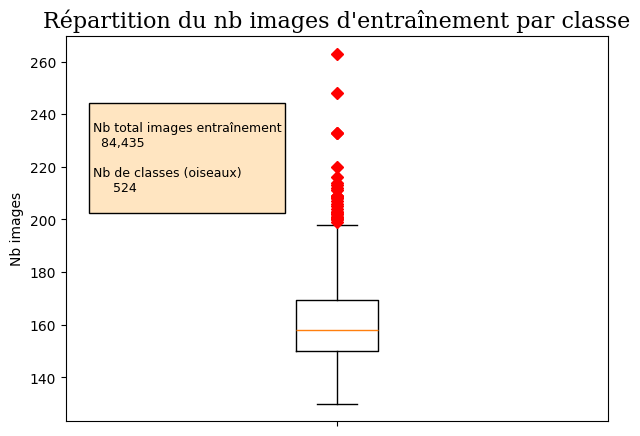

In [16]:
# Analyse distribution du nb d'images par classe pour train : boxplot
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
ax1.boxplot(df_train['nb_img_train'], 0, 'rD')
ax1.set_xticks([1], [])
ax1.set_ylabel('Nb images')
titre = ax1.set_title("Répartition du nb images d'entraînement par classe")
titre.set(color="black", fontsize="16", fontfamily="serif")

# Ajout graphique emboîté : histogramme de distribution
# ax1b = ax1.inset_axes([0.65, 0.58, 0.3, 0.25], facecolor='#ffe5c1')
# ax1b.hist(df, color='#FFC575', bins=20, edgecolor='black', linewidth=0.4)
# ax1b.set_xticks([ ])
# ax1b.set_yticks([ ])
# ax1b.set_xlabel('Distribution')

# Ajout texte avec informations complémentaires dans le graphique
txt = f"""
Nb total images entraînement
{df_train['nb_img_train'].sum():>8,.0f}

Nb de classes (oiseaux)
{df_train.shape[0]:>8,.0f}
"""
t = ax1.text(0.55, 205, txt, fontsize="9", bbox={'boxstyle':'square',
                   'facecolor': '#ffe5c1',
                   'edgecolor':'black'})

# Calcul métriques
med = df_train['nb_img_train'].median()
q1, q3 = df_train['nb_img_train'].quantile(q=0.25), df_train['nb_img_train'].quantile(q=0.75)


In [58]:
html_content = """

<p><b> Ce graphique permet de mettre en avant encore plus les valeurs extrêmes.<p>
On voit aussi que la médiane est de {med:.0f} images par classe et que la moitié des classes 
contiennent entre {q1:.0f} et {q3:.0f} images</b></p>

""".format(med=med, q1=q1, q3=q3)
display(HTML(html_content))

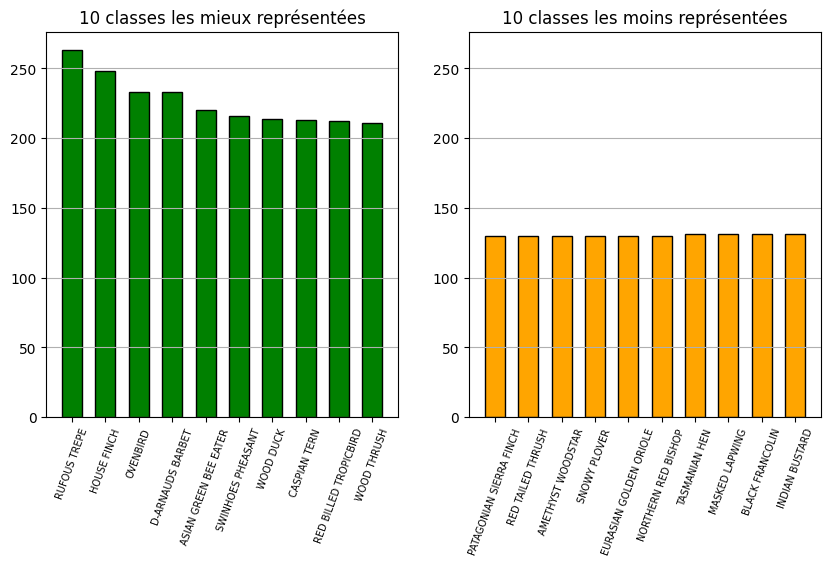

In [17]:
### Affichage des 10 classes les mieux et moins bien représentées dans train
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)

# 10 Classes les mieux representées
best = df_train.sort_values(by='nb_img_train', ascending=False).head(10)
ax1.bar(best.index, best['nb_img_train'], color='green', width=0.6, edgecolor='black')
ax1.grid(True, axis='y')
ax1.set_title('10 classes les mieux représentées')
ax1.tick_params(axis='x', labelrotation=70)
for t in ax1.get_xticklabels():
   t.set_fontsize(7.)

# 10 Classes les moins bien representées
worse = df_train.sort_values(by='nb_img_train').head(10)
ax2.bar(worse.index, worse['nb_img_train'], color='orange', width=0.6, edgecolor='black')
ax2.grid(True, axis='y')
ax2.set_title('10 classes les moins représentées')
ax2.tick_params(axis='x', labelrotation=70)
for t in ax2.get_xticklabels():
   t.set_fontsize(7.)


In [60]:
# html_content = """

# <h2> Remarques sur les graphiques </h2>
# <p> On remarque avec tous ces graphiques que le nombre d'images par classe est très variable, entre 130 et 260. 
# Il sera nécessaire d'équilibrer le dataset, probablement en faisant un mix de suppression pour les rares classes ayant plus de 220 images, 
# et une augmentation des données des autres classes.</p>
# <p> Il est possible de dupliquer les images, pour donner un poids équivalent à toutes les classes; il est aussi envisageable d'appliquer des
# transformations de luminosité, contraste et saturation pour augmenter artificiellement des classes faibles. </p>
# <p> Le camembert nous permet ici de voir que le jeu de test et de validation contiennent très peu d'images en comparaison du jeu train,
# et il serait préférable de refaire par nous-même la répartition avec un pourcentage d'images test/valid entre 20% et 30% du total des images. </p>
# """

html_content = """

# <h2> Conclusions des 1ères analyses descriptives </h2>
<p><b> 1) L'analyse du poids de chaque échantillon dans le jeu de données nous permet de constater 
que le jeu de test et de validation contiennent très peu d'images en comparaison du jeu d'entraînement. </b> 
<p><FONT COLOR="#CC6600"> La 1ère étape du préprocessing sera de refaire par nous-même la répartition avec un pourcentage 
d'images test/valid entre 20% et 30% du total des images. </b></FONT COLOR="#CC6600">
<p><i> NB : Le dossier "PARAKETT  AUKLET" de l'échantillon de test et d'entraînement sera à renommer avant 
la fusion des différents jeux de données initiaux </p></i>

<p><b> 2) Les différents graphiques de dipersion nous montre que la distribution du nombre d'images par classe 
est hétérogène.</B>
<p><FONT COLOR="#CC6600"> Une autre étape du préprocessing sera d'équilibrer le dataset, probablement en faisant un mix de 
suppression pour les rares classes ayant plus de 220 images, et une augmentation des données des autres 
classes.</p></FONT COLOR="#CC6600">
<p><i> Il est possible de dupliquer les images, pour donner un poids équivalent à toutes les classes; il est aussi envisageable 
d'appliquer des transformations de luminosité, contraste et saturation pour augmenter artificiellement des classes faibles. </p>

"""
display(HTML(html_content))